# Knowing your data

* Summarise it
* Feature normalization
* Dimensionality of data
* Visualising high dimensional data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
fullData = pd.read_csv('data/monthlyData.csv')
fullData.head(5)
print(fullData.columns)
print(fullData.index)


Index(['ISO_3DIGIT', 'Jan_Temp', 'Feb_temp', 'Mar_temp', 'Apr_Temp',
       'May_temp', 'Jun_Temp', 'July_Temp', 'Aug_Temp', 'Sept_temp',
       'Oct_temp', 'Nov_Temp', 'Dec_temp', 'Annual_temp', 'Jan_precip',
       'Feb_precip', 'Mar_precip', 'Apr_precip', 'May_precip', 'Jun_precip',
       'July_precip', 'Aug_precip', 'Sept_precip', 'Oct_precip', 'Nov_precip',
       'Dec_precip', 'Annual_precip', 'tropical', 'labels'],
      dtype='object')
RangeIndex(start=0, stop=178, step=1)


# Summarise the data

* ML is primarily about pattern recognition
* Understanding the data gives insight into patterns
* Feasibility of approaches : linear/non-linear, parametric/non-parametric
* Basic statistics already give useful peek
* First step. Always.

In [ ]:
# Plot the summary of the data
# For example: Mean and variance per column

(<matplotlib.axes._subplots.AxesSubplot at 0x24f65d9f278>,
 (array([99.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 79.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <a list of 10 Patch objects>))

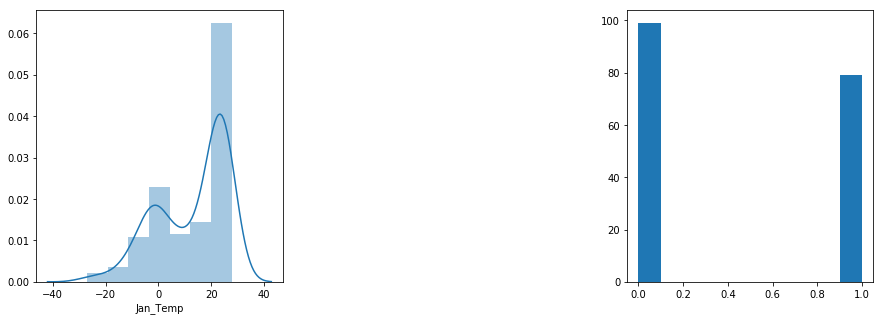

In [12]:
# plot the frequency histograms/distribution of:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1,3,1), sns.distplot(fullData["Jan_Temp"])
# Annual temp
#sns.distplot(fullData["Jan_Temp"])
# Annual precip. 
#sns.distplot(fullData["Annual_precip"])
# Their pairwise relations
#fig.add_subplot(1,3,2), sns.pairplot(fullData[["Annual_temp", "Annual_precip"]])
#sns.pairplot(fullData.iloc[:,:10])
fig.add_subplot(1,3,3), plt.hist(np.asarray(fullData["tropical"], dtype=int))

### Task 1: Which of the two countries in the dataset are the most similar and which two are the most dissimilar? 

In [13]:
fullData.columns
smallData = fullData[["ISO_3DIGIT", "Annual_temp", "Annual_precip", "labels"]]
smallData.head()

,ISO_3DIGIT,Annual_temp,Annual_precip,labels
0,AFG,12.92,31.132,1
1,AGO,21.51,99.131,2
2,ALB,11.27,105.324,0
3,ARE,26.83,6.781,1
4,ARG,14.22,55.905,0


In [14]:
from sklearn.metrics import pairwise_distances

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[ 12.92   31.132]
 [ 21.51   99.131]
 [ 11.27  105.324]
 [ 26.83    6.781]
 [ 14.22   55.905]]
[[ 12.92   31.132]
 [ 21.51   99.131]
 [ 11.27  105.324]
 [ 26.83    6.781]
 [ 14.22   55.905]]
<built-in method argmax of numpy.ndarray object at 0x0000024F682E35D0>


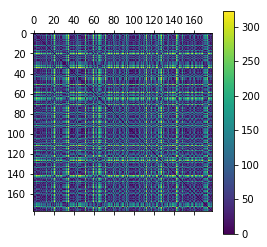

In [22]:
# one way could be compute the distance between each data point in the feature space

dist = pairwise_distances(fullData[["Annual_temp", "Annual_precip"]].values.reshape(-1,2))
# dataframe -> array -> transform
print(type(fullData[["Annual_temp", "Annual_precip"]]))
print(type(fullData[["Annual_temp", "Annual_precip"]].values))
print(fullData[["Annual_temp", "Annual_precip"]].values[:5,:])
print(fullData[["Annual_temp", "Annual_precip"]].values.reshape(-1,2)[:5,:])
# dist[0, :].mix
# dist[0, :].min
# argmax equle R which.max
print(dist[0,:].argmax)
plt.matshow(dist)
plt.colorbar()
# And query the pairs which are nearest in terms of the distance


In [31]:
smallData.iloc[dist[0,:].argmax(),0]
smallData.iloc[dist[0, (dist[0,:] > 0 )].argmin(), 0]

'LVA'

In [39]:
# 0 = find the max on row
maxDist = dist.argmax(1)
#help(np.argmax)

In [69]:
# max in clonums
maxDist = dist.max(0)
#maxDist
# max in row
maxDist = dist.max(1)
#maxDist

# Feature Normalization

* Feature selection in a "Learning from data" setting
* Give all features equal importance (at input)
* Similarity between data points is a useful indicator
* Distance measures are commonly used to compare data points
* If different features are of different dimensions, the distance measure is skewed
* **Learn the transformation on training data and apply to test data**

## Feature rescaling

A simple strategy is to force the features to be in a fixed range, mostly [0,1] or [-1,1].

_This is predominantly used to improve convergence of algorithms_

$X' = \frac{(X-max(X))}{(max(X)-min(X)} $

### Task 2: Perform feature rescaling on the two features.

In [66]:
temp = np.arange(10)
temp.mean()
temp.std()

2.8722813232690143

In [40]:
# function 1
def scal(f1, f2):
    f1s = (f1-min(f1))/(max(f1)-min(f1))
    f2s = (f2-min(f2))/(max(f2)-min(f2))
    return f1s,f2s

# function 2

smallData.head()
f1 = smallData.iloc[:, 1]
f2 = smallData.iloc[:, 2]


#smallData[["temp_res", "precip_res"]] = #scal(f1, f2)
smallData["temp_res"] ,smallData["precip_res"]  = scal(f1, f2)
# = scal(f1, f2)[2]
#scal(f1, f2)
# decribe
smallData.describe()

D:\sofatware\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Annual_temp,Annual_precip,labels,temp_res,precip_res
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,17.965506,112.720112,1.825843,0.723972,0.338229
std,8.627845,79.520043,0.931559,0.230445,0.245784
min,-9.140000,3.291000,0.000000,0.000000,0.000000
25%,10.090000,54.702000,1.000000,0.513622,0.158903
50%,21.580000,99.803000,2.000000,0.820513,0.298304
75%,25.042500,164.357000,2.000000,0.912994,0.497830
max,28.300000,326.827000,3.000000,1.000000,1.000000


D:\sofatware\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


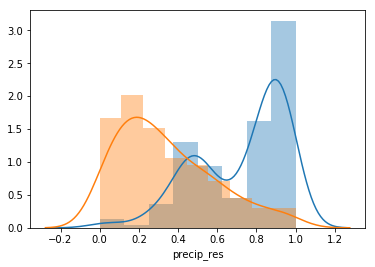

In [41]:
sns.distplot(smallData["temp_res"])
sns.distplot(smallData["precip_res"])

## Standard normalization

Another common strategy is to force the data to have zero mean and unit variance. This gives equal preference to all features and the distances in the feature space are more reasonable. 

_More reasonable choice when different features have to be compared_

$X' = \frac{(X-mean(X))}{std(X)} $

### Task 3: Perform standard normalization on the two features. 


In [42]:
def scal2(f1, f2):
    f1s = (f1-f1.mean())/f1.std()
    f2s = (f2-f2.mean())/f2.std()
    return f1s,f2s

smallData.head()
f1 = smallData.iloc[:, 1]
f2 = smallData.iloc[:, 2]


#smallData[["temp_res", "precip_res"]] = #scal(f1, f2)
smallData["temp_res"] ,smallData["precip_res"]  = scal(f1, f2)
# decribe
smallData.describe()

D:\sofatware\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Annual_temp,Annual_precip,labels,temp_res,precip_res
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,17.965506,112.720112,1.825843,0.723972,0.338229
std,8.627845,79.520043,0.931559,0.230445,0.245784
min,-9.140000,3.291000,0.000000,0.000000,0.000000
25%,10.090000,54.702000,1.000000,0.513622,0.158903
50%,21.580000,99.803000,2.000000,0.820513,0.298304
75%,25.042500,164.357000,2.000000,0.912994,0.497830
max,28.300000,326.827000,3.000000,1.000000,1.000000


### Task 4: Compute the similarity between the countries using: 
* Rescaled features
* Normalized features. 
* Is there a difference? 
* Is it always reasonable to perform feature rescaling?

# Data dimensionality

* 1D, 2D or even 3D data are reasonable to visualise and analyse
* Most real world problems come in higher dimensions
* Things are way more complicated when D increases

## Task
 * Think of how the PLA can be used on the temp-precipitation data, if instead of the two columns all monthly values had to be used. 
 * How would this affect the classification
 * Try visualising the data in these dimensions.

## Curse of dimensionality

_The curse of dimensionality[1], indicates that the number of samples needed to estimate an arbitrary function with a given level of accuracy grows exponentially with respect to the number of input variables (i.e., dimensionality) of the function._

[1] Bellman R.E. Adaptive Control Processes. Princeton University Press, Princeton, NJ, 1961.

The pdf evaluated at mean yields:0.398434


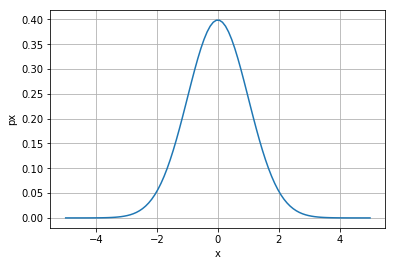

In [43]:
# Let us try with a simple example. 
# In a 1-D Gaussian/Normal distribution, maximum probability point is at the mode which is also the mean in this case. 

from scipy.stats import multivariate_normal

x = np.linspace(-5,5,100)
px = multivariate_normal.pdf(x, 0, 1)
plt.plot(x, px)
plt.grid()
plt.xlabel('x')
plt.ylabel('px');
print('The pdf evaluated at mean yields:%f' %px.max())

### So, what happens to the high probability region around the mean for higher dimensions

In [51]:
np.zeros(3)
np.eye(3) # to generate the uniform matrix
#help(np.ones)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [57]:
px = np.empty(0)
dim = np.arange(1,20)
for x in dim:
    
    mVec = np.zeros(x)
    cVec = np.eye(x) # ?eye

    p = multivariate_normal.pdf(mVec, mVec, cVec)
    print('Dim: %d -> pdf: %f' %(x,p))
    #px = np.concatenate((px,p),axis=None)
    px = np.concatenate((px,p),axis=None)

Dim: 1 -> pdf: 0.398942
Dim: 2 -> pdf: 0.159155
Dim: 3 -> pdf: 0.063494
Dim: 4 -> pdf: 0.025330
Dim: 5 -> pdf: 0.010105
Dim: 6 -> pdf: 0.004031
Dim: 7 -> pdf: 0.001608
Dim: 8 -> pdf: 0.000642
Dim: 9 -> pdf: 0.000256
Dim: 10 -> pdf: 0.000102
Dim: 11 -> pdf: 0.000041
Dim: 12 -> pdf: 0.000016
Dim: 13 -> pdf: 0.000006
Dim: 14 -> pdf: 0.000003
Dim: 15 -> pdf: 0.000001
Dim: 16 -> pdf: 0.000000
Dim: 17 -> pdf: 0.000000
Dim: 18 -> pdf: 0.000000
Dim: 19 -> pdf: 0.000000


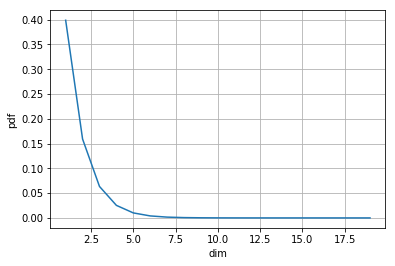

In [75]:
plt.plot(dim,px)
plt.xlabel('dim')
plt.ylabel('pdf')
plt.grid();

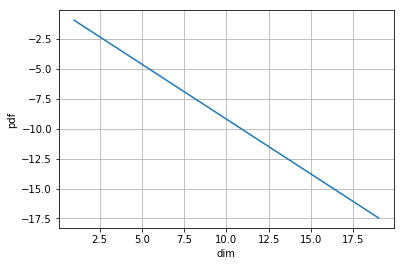

In [76]:
plt.plot(dim,np.log(px))
plt.xlabel('dim')
plt.ylabel('pdf')
plt.grid();

## Dealing with high dimensional data
* Remove redundant dimensions
* Derive combined features 
* Dimensionality reduction techniques

# Visualizing high dimensional data

* Prinicipal Component Analysis
* t-Distributed Stochastic Neighbour Embedding


## PCA (In depth tomorrow)
**Preserves large pairwise distances to maximize variance**


In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [60]:
dataNp = fullData.iloc[:,1:-1].values
dataNp

array([[0.07, 2.11, 7.6, ..., 3.154, 31.132, False],
       [22.58, 22.68, 22.78, ..., 15.515999999999998, 99.131, True],
       [2.02, 3.22, 6.04, ..., 13.830000000000002, 105.324, False],
       ...,
       [23.19, 22.66, 21.1, ..., 5.7159999999999975, 47.478, False],
       [22.89, 22.94, 22.9, ..., 22.45, 100.475, True],
       [23.9, 23.49, 22.92, ..., 14.524, 66.89699999999999, False]],
      dtype=object)

In [61]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(dataNp)

In [62]:
pca.explained_variance_ratio_

array([0.83448641, 0.10435429])

In [63]:
projections = pd.DataFrame()
projections['labels'] = fullData["tropical"]
projections['pc1'] = pca_res[:,0]
projections['pc2'] = pca_res[:,-1]

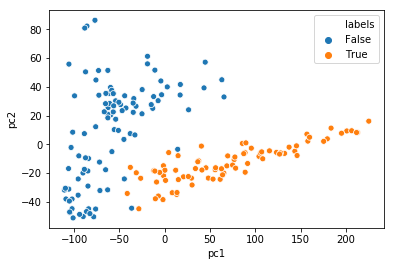

In [64]:
sns.scatterplot(x='pc1',y='pc2',data=projections,hue="labels")

# t-SNE
**Preserves small pairwise distances (local similarities)**

With t-SNE, we are looking for a mapping,

$f(\cdot): \mathbf{x} \in \mathbb{R}^d \rightarrow \mathbf{y} \in \mathbb{R}^p $, in most cases $1 \leq p \leq 3$

Three steps: 
* Measure similarities in high dimensional space. Obtain a Gaussian distribution of similarities.
* Try to match the high dimensional distribution to a low dimensional t-distribution
* Minimize KL divergence to obtain the new mapping

In [65]:
tsne = TSNE(n_components=2,verbose=1)
tsne_res = tsne.fit_transform(dataNp)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 29.697708
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.018181
[t-SNE] KL divergence after 750 iterations: 0.231721


In [66]:
projections['ts1'] = tsne_res[:,0]
projections['ts2'] = tsne_res[:,-1]

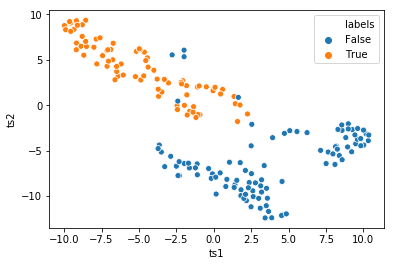

In [67]:
sns.scatterplot(x='ts1',y='ts2',data=projections,hue="labels")